In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler , RobustScaler , OrdinalEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , r2_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC , LinearSVC
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from warnings import filterwarnings
filterwarnings("ignore")
import random
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier , XGBRegressor
from sklearn.cluster import KMeans , DBSCAN , AgglomerativeClustering


In [34]:
df = pd.read_csv("/content/df_merged_final.csv")
df

,Unnamed: 0,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,...,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,...,55.88,45.72,40.64,91.44,99.06,104.14,60.96,78.74,63.50,99.06
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,...,66.04,45.72,76.20,63.50,66.04,73.66,71.12,66.04,71.12,104.14
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,...,55.88,45.72,40.64,91.44,99.06,104.14,60.96,78.74,63.50,99.06
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,...,63.50,40.64,30.48,33.02,50.80,33.02,53.34,43.18,50.80,73.66
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,...,55.88,43.18,43.18,30.48,33.02,71.12,45.72,48.26,43.18,68.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0,...,66.04,50.80,93.98,71.12,66.04,68.58,71.12,71.12,68.58,106.68
14996,14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0,...,58.42,40.64,43.18,101.60,104.14,114.30,53.34,55.88,53.34,93.98
14997,14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,...,25.40,40.64,25.40,48.26,78.74,40.64,50.80,48.26,50.80,73.66
14998,14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,...,55.88,45.72,40.64,91.44,99.06,104.14,60.96,78.74,63.50,99.06


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15000 non-null  int64  
 1   User_ID            15000 non-null  int64  
 2   Gender             15000 non-null  object 
 3   Age                15000 non-null  int64  
 4   Height             15000 non-null  float64
 5   Weight             15000 non-null  float64
 6   Duration           15000 non-null  float64
 7   Heart_Rate         15000 non-null  float64
 8   Body_Temp          15000 non-null  float64
 9   Calories           15000 non-null  float64
 10  Exercise_type_raw  15000 non-null  object 
 11  HeadCircumference  15000 non-null  float64
 12  ShoulderWidth      15000 non-null  float64
 13  ChestWidth         15000 non-null  float64
 14  Belly              15000 non-null  float64
 15  Waist              15000 non-null  float64
 16  Hips               150

In [36]:
df.drop(columns=["Unnamed: 0" , "User_ID"] , inplace=True)

In [37]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0
Exercise_type_raw,0
HeadCircumference,0


In [38]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [39]:
df["Exercise_type_raw"].value_counts()

,count
Exercise_type_raw,
Watering lawn or garden,2944
"Walking, under 2.0 mph, very slow",754
"Cycling, 14-15.9 mph, vigorous",627
Stair machine,616
Mild stretching,577
Unicycling,561
"Stationary cycling, light",503
"Stationary cycling, moderate",496
"Cycling, 12-13.9 mph, moderate",475


In [40]:
activity_map = {
    "Watering lawn or garden": "Lightly Active",
    "Walking, under 2.0 mph, very slow": "Lightly Active",
    "Cycling, 14-15.9 mph, vigorous": "Very Active",
    "Stair machine": "Very Active",
    "Mild stretching": "Sedentary",
    "Unicycling": "Moderately Active",
    "Stationary cycling, light": "Lightly Active",
    "Stationary cycling, moderate": "Moderately Active",
    "Cycling, 12-13.9 mph, moderate": "Moderately Active",
    "Climbing hills, carrying 10 to 20 lb": "Very Active",
    "Ballet, twist, jazz, tap": "Moderately Active",
    "Cycling, 10-11.9 mph, light": "Lightly Active",
    "Cycling, mountain bike, bmx": "Very Active",
    "Stationary cycling, vigorous": "Very Active",
    "Walking 3.0 mph, moderate": "Moderately Active",
    "Stationary cycling, very light": "Lightly Active",
    "Stationary cycling, very vigorous": "Very Active",
    "Standing, playing with children, light": "Sedentary",
    "Running, 6.7 mph (9 min mile)": "Very Active",
    "Calisthenics, light": "Lightly Active",
    "Cycling, <10 mph, leisure bicycling": "Lightly Active",
    "Walking 3.5 mph, brisk pace": "Moderately Active",
    "Running, 7 mph (8.5 min mile)": "Very Active",
    "Golf, walking and pulling clubs": "Moderately Active",
    "Aerobics, general": "Moderately Active",
    "Running, 8 mph (7.5 min mile)": "Very Active",
    "Cycling, 16-19 mph, very fast, racing": "Very Active",
    "Walking 4.5 mph": "Moderately Active",
    "Running, 8.6 mph (7 min mile)": "Very Active",
    "Running, 9 mph (6.5 min mile)": "Very Active",
    "Running, 10.9 mph (5.5 min mile)": "Extra Active",
    "Cycling, >20 mph, racing": "Extra Active",
    "Cross country skiing, uphill": "Extra Active"
}

df["activity_level"] = df["Exercise_type_raw"].map(activity_map)

multiplier = {
    "Sedentary": 1.2,
    "Lightly Active": 1.375,
    "Moderately Active": 1.55,
    "Very Active": 1.725,
    "Extra Active": 1.9
}

df["activity_multiplier"] = df["activity_level"].map(multiplier)

In [41]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Exercise_type_raw,HeadCircumference,...,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,activity_level,activity_multiplier
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,"Cycling, 16-19 mph, very fast, racing",55.88,...,40.64,91.44,99.06,104.14,60.96,78.74,63.50,99.06,Very Active,1.725
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,"Stationary cycling, light",66.04,...,76.20,63.50,66.04,73.66,71.12,66.04,71.12,104.14,Lightly Active,1.375
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,Watering lawn or garden,55.88,...,40.64,91.44,99.06,104.14,60.96,78.74,63.50,99.06,Lightly Active,1.375
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,Unicycling,63.50,...,30.48,33.02,50.80,33.02,53.34,43.18,50.80,73.66,Moderately Active,1.550
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,"Stationary cycling, very light",55.88,...,43.18,30.48,33.02,71.12,45.72,48.26,43.18,68.58,Lightly Active,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0,Mild stretching,66.04,...,93.98,71.12,66.04,68.58,71.12,71.12,68.58,106.68,Sedentary,1.200
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0,Watering lawn or garden,58.42,...,43.18,101.60,104.14,114.30,53.34,55.88,53.34,93.98,Lightly Active,1.375
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0,Walking 4.5 mph,25.40,...,25.40,48.26,78.74,40.64,50.80,48.26,50.80,73.66,Moderately Active,1.550
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0,Watering lawn or garden,55.88,...,40.64,91.44,99.06,104.14,60.96,78.74,63.50,99.06,Lightly Active,1.375


In [42]:
df = df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height_cm',
    'Weight': 'weight_kg',
    'Duration': 'exercise_duration_min',
    'Heart_Rate': 'heart_rate',
    'Body_Temp': 'body_temp_c',
    'Calories': 'calories_burned',
    'Exercise_type_raw': 'exercise_type',
    'HeadCircumference': 'head_circumference_cm',
    'ShoulderWidth': 'shoulder_width_cm',
    'ChestWidth': 'chest_width_cm',
    'Belly': 'belly_cm',
    'Waist': 'waist_cm',
    'Hips': 'hips_cm',
    'ArmLength': 'arm_length_cm',
    'ShoulderToWaist': 'shoulder_to_waist_cm',
    'WaistToKnee': 'waist_to_knee_cm',
    'LegLength': 'leg_length_cm',
    'Exercise_TE': 'exercise_target'
})

In [43]:
def calculate_bmr(weight, height, age, gender):
    if gender.lower() == "male":
        return (10 * weight) + (6.25 * height) - (5 * age) + 5
    else:
        return (10 * weight) + (6.25 * height) - (5 * age) - 161

In [44]:
df["BMR"] = df.apply(lambda row: calculate_bmr(row["weight_kg"],
                                               row["height_cm"],
                                               row["age"],
                                               row["gender"]), axis=1)

df["BMI"] = df["weight_kg"] / ((df["height_cm"]/100) ** 2)
df["Calories_Needed_Intake"] = df["BMR"]*df["activity_multiplier"]

In [45]:
df

,gender,age,height_cm,weight_kg,exercise_duration_min,heart_rate,body_temp_c,calories_burned,exercise_type,head_circumference_cm,...,hips_cm,arm_length_cm,shoulder_to_waist_cm,waist_to_knee_cm,leg_length_cm,activity_level,activity_multiplier,BMR,BMI,Calories_Needed_Intake
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,"Cycling, 16-19 mph, very fast, racing",55.88,...,104.14,60.96,78.74,63.50,99.06,Very Active,1.725,1792.50,26.038781,3092.06250
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,"Stationary cycling, light",66.04,...,73.66,71.12,66.04,71.12,104.14,Lightly Active,1.375,1376.50,21.773842,1892.68750
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,Watering lawn or garden,55.88,...,104.14,60.96,78.74,63.50,99.06,Lightly Active,1.375,1568.75,24.655910,2157.03125
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,Unicycling,63.50,...,33.02,53.34,43.18,50.80,73.66,Moderately Active,1.550,1497.75,22.159109,2321.51250
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,"Stationary cycling, very light",55.88,...,71.12,45.72,48.26,43.18,68.58,Lightly Active,1.375,1246.50,24.456063,1713.93750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0,Mild stretching,66.04,...,68.58,71.12,71.12,68.58,106.68,Sedentary,1.200,1805.25,23.087868,2166.30000
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0,Watering lawn or garden,58.42,...,114.30,53.34,55.88,53.34,93.98,Lightly Active,1.375,1385.25,23.875115,1904.71875
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0,Walking 4.5 mph,25.40,...,40.64,50.80,48.26,50.80,73.66,Moderately Active,1.550,1197.75,22.942130,1856.51250
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0,Watering lawn or garden,55.88,...,104.14,60.96,78.74,63.50,99.06,Lightly Active,1.375,1791.25,26.040968,2462.96875


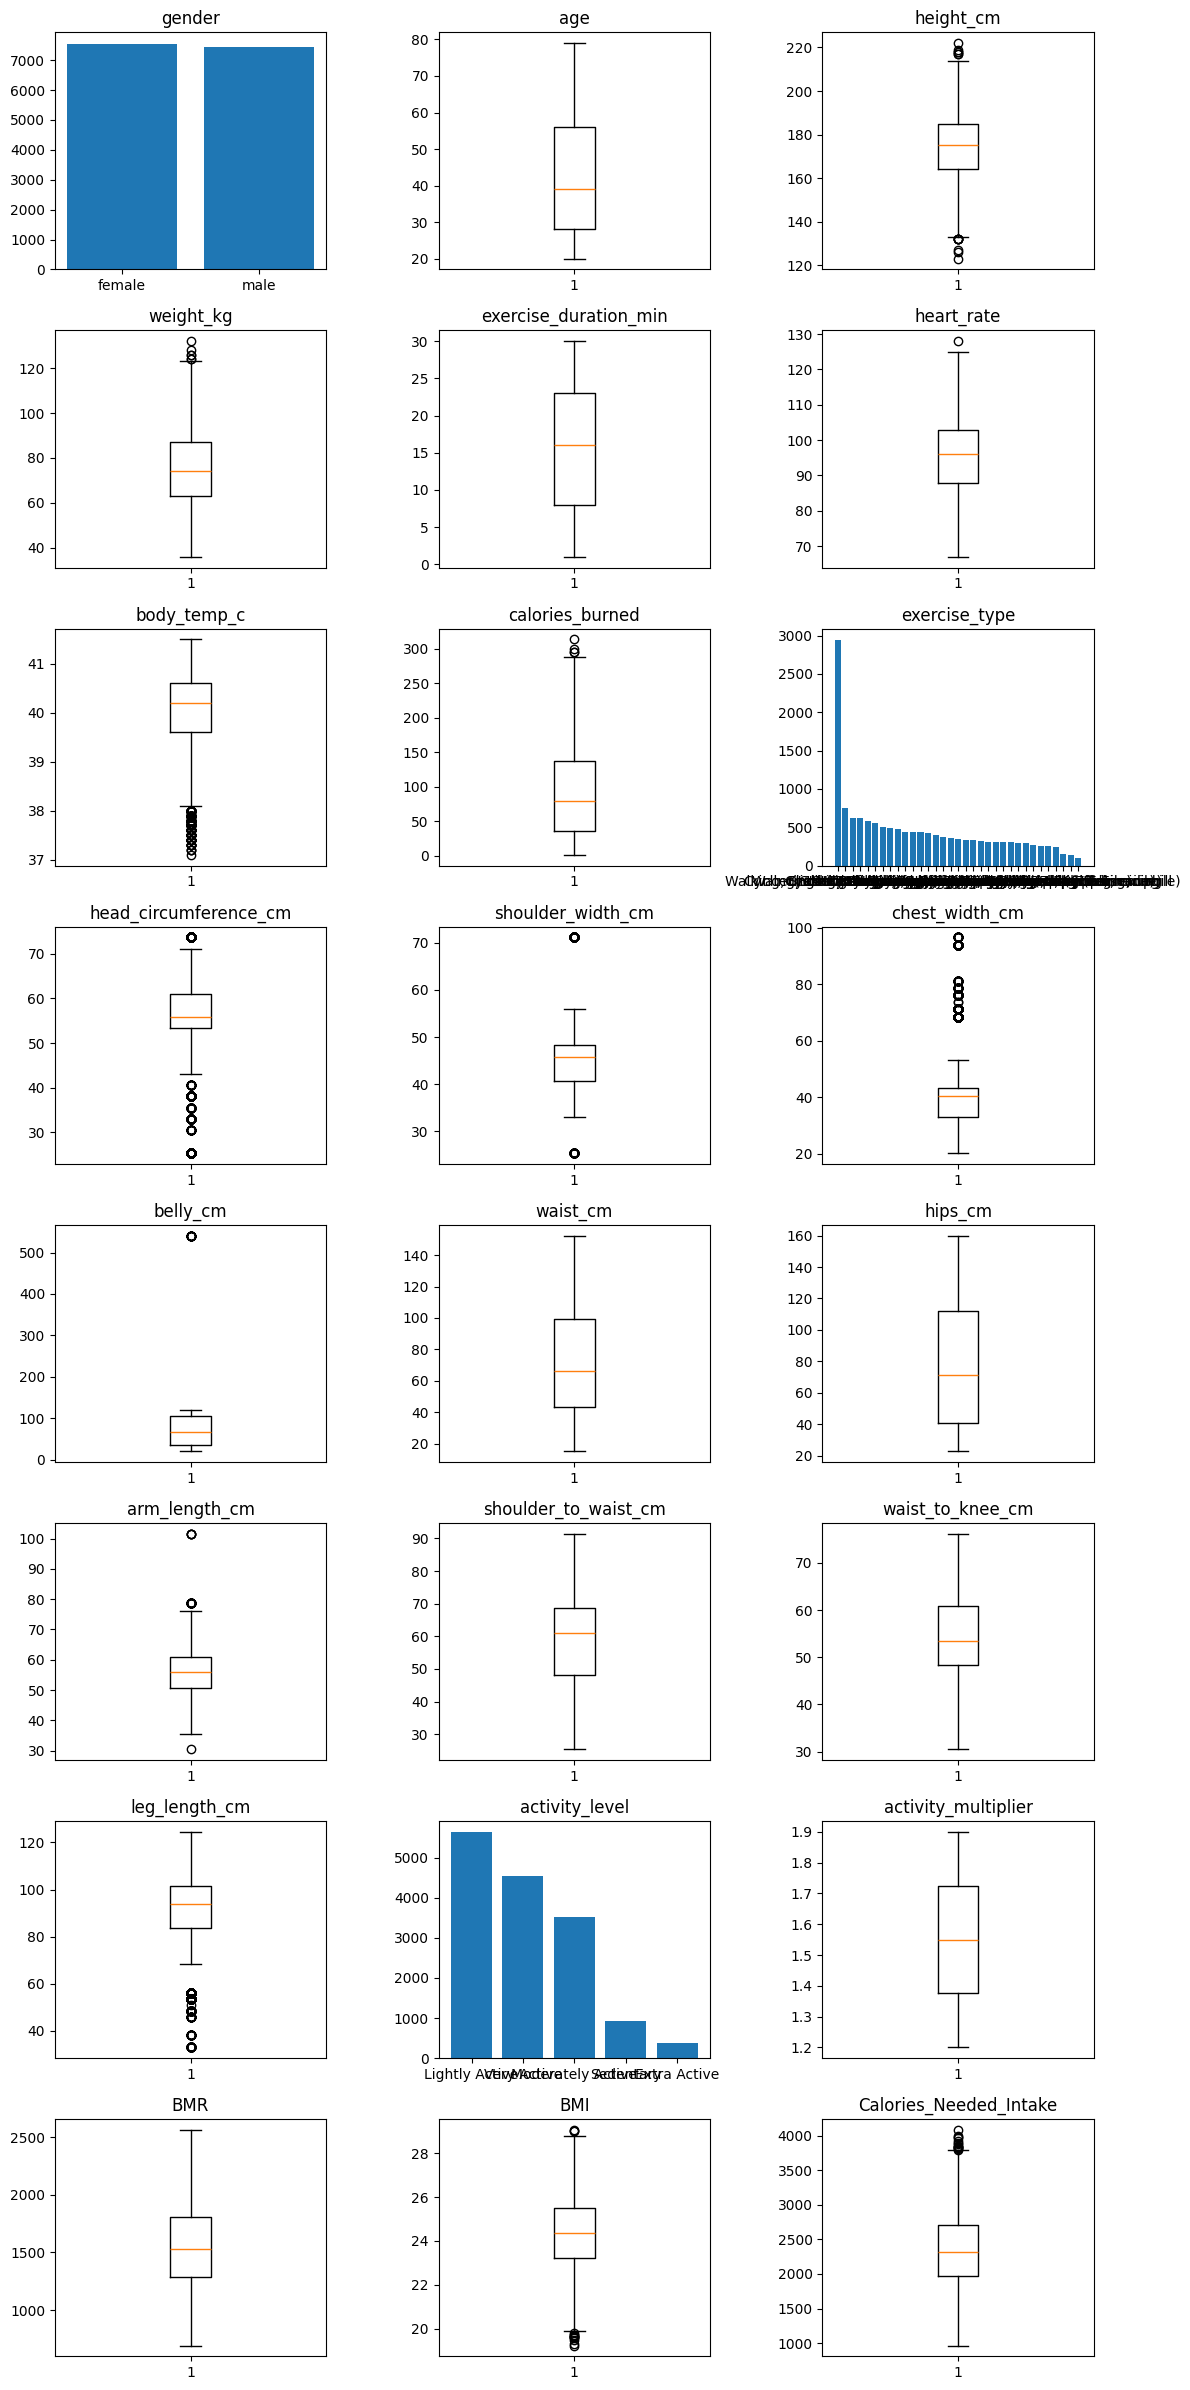

In [46]:
import math
import matplotlib.pyplot as plt

n = len(df.columns)
n_cols = 3
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)

    if df[col].dtype in ['int64', 'float64']:
        plt.boxplot(df[col])
    else:
        plt.bar(df[col].value_counts().index, df[col].value_counts().values)

    plt.title(col)
plt.tight_layout()
plt.show()


In [47]:
df.columns

Index(['gender', 'age', 'height_cm', 'weight_kg', 'exercise_duration_min',
       'heart_rate', 'body_temp_c', 'calories_burned', 'exercise_type',
       'head_circumference_cm', 'shoulder_width_cm', 'chest_width_cm',
       'belly_cm', 'waist_cm', 'hips_cm', 'arm_length_cm',
       'shoulder_to_waist_cm', 'waist_to_knee_cm', 'leg_length_cm',
       'activity_level', 'activity_multiplier', 'BMR', 'BMI',
       'Calories_Needed_Intake'],
      dtype='object')

In [48]:
cols = ["belly_cm" , "arm_length_cm" , "shoulder_width_cm" , "chest_width_cm" , "leg_length_cm" , "head_circumference_cm"]
for col in cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1

    Lower_fience = Q1 - 1.5 * IQR
    Higher_fience = Q3 + 1.5 * IQR

    Lower_Outliers = df[df[col] < Lower_fience][col].values
    Higher_Outliers = df[df[col] > Higher_fience][col].values

    df[col].replace(Lower_Outliers , Lower_fience , inplace=True)
    df[col].replace(Higher_Outliers , Higher_fience , inplace=True)

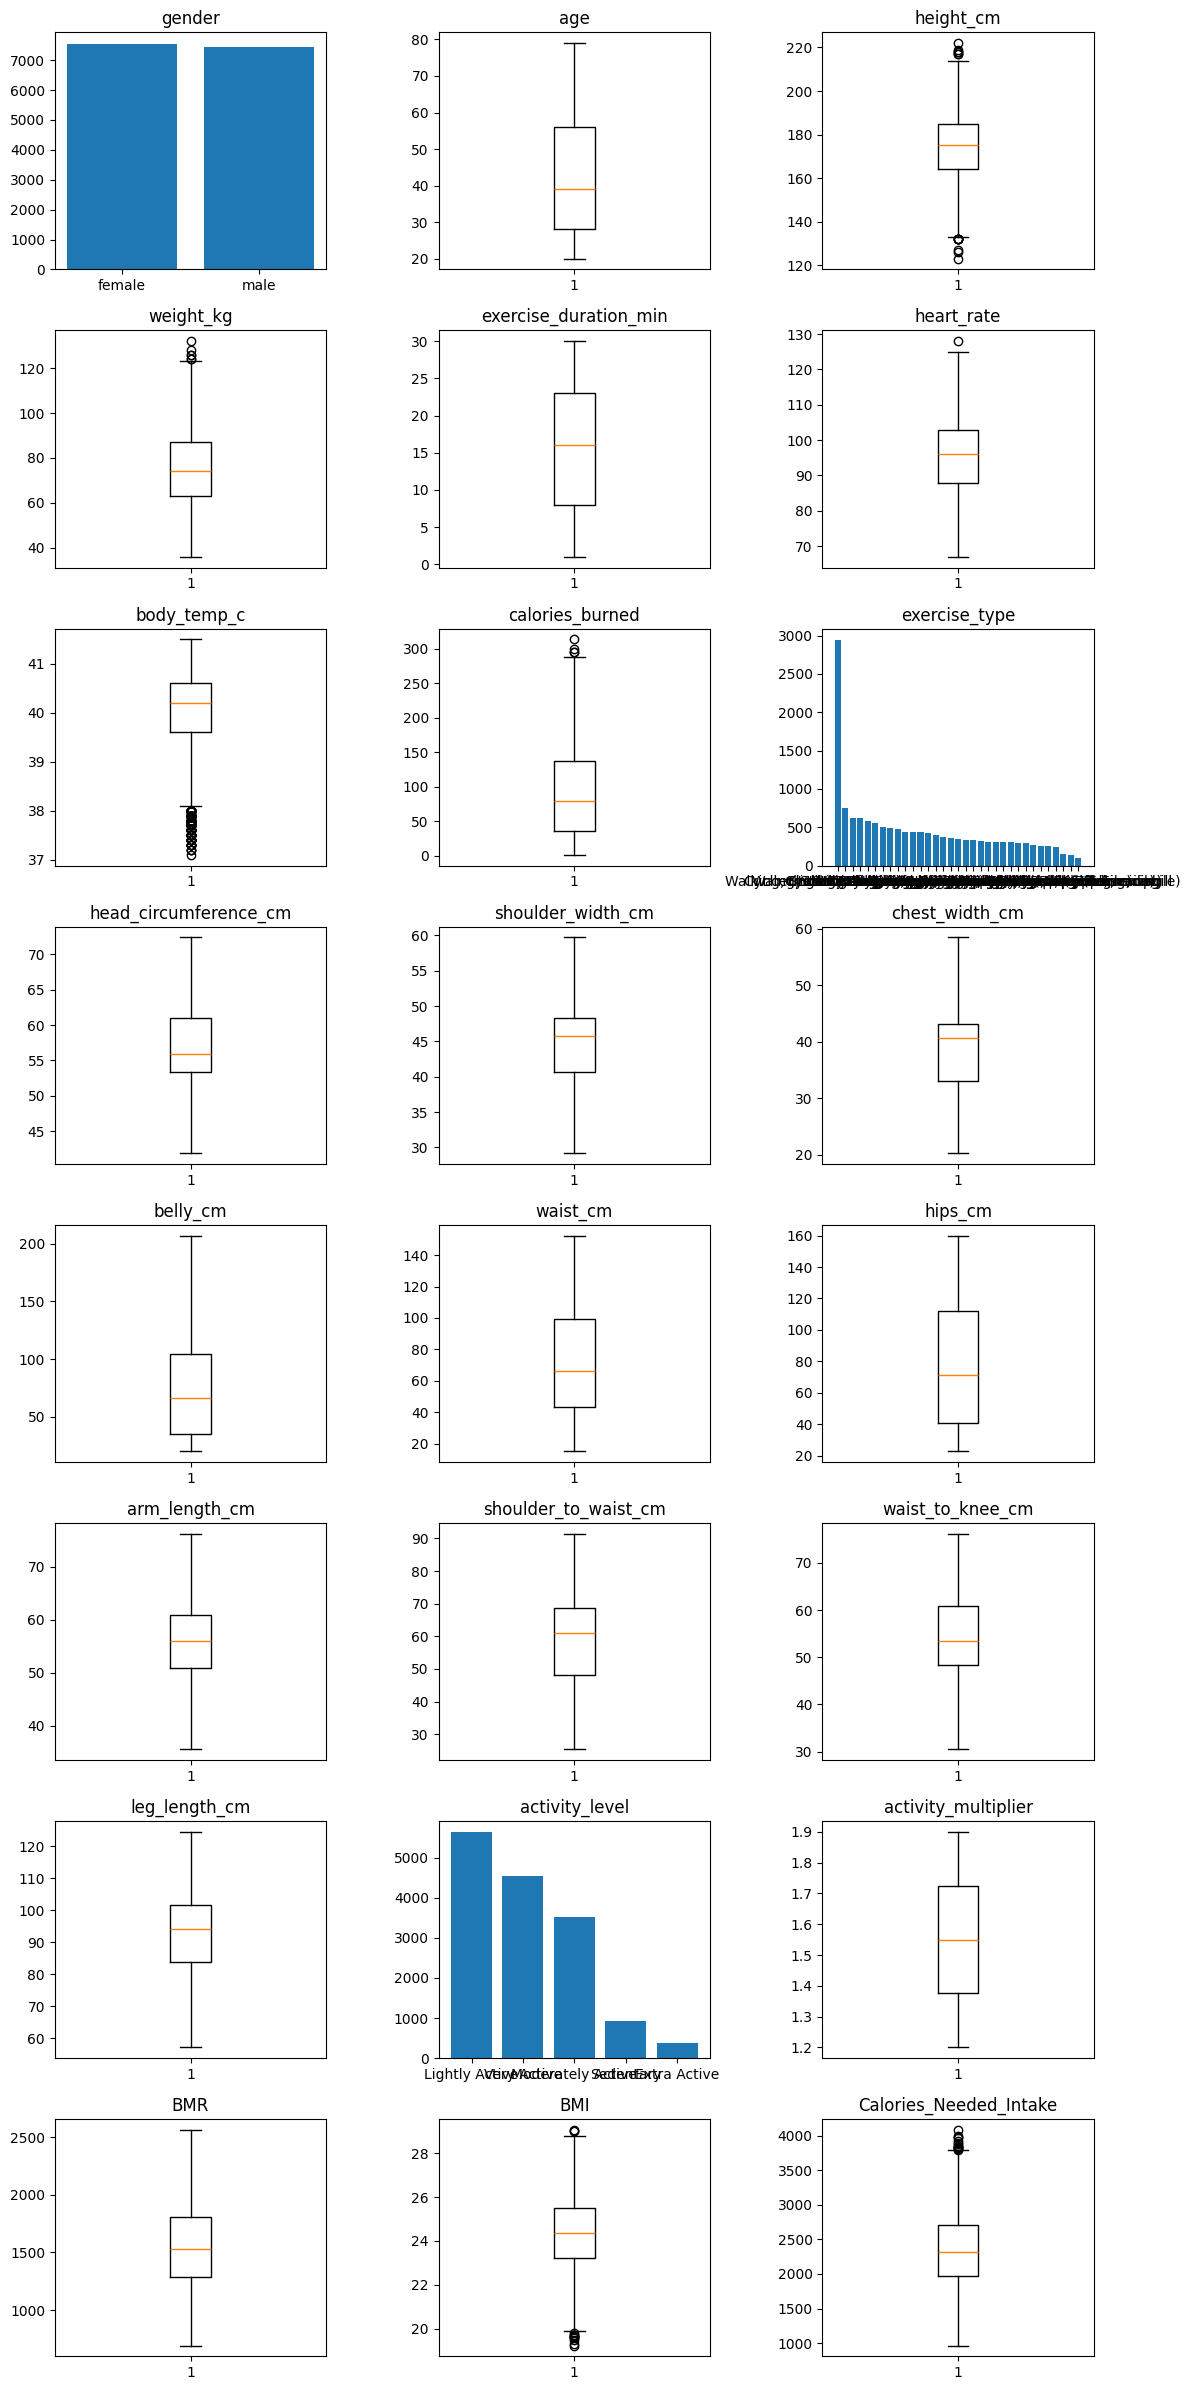

In [49]:
import math
import matplotlib.pyplot as plt

n = len(df.columns)
n_cols = 3
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)

    if df[col].dtype in ['int64', 'float64']:
        plt.boxplot(df[col])
    else:
        plt.bar(df[col].value_counts().index, df[col].value_counts().values)

    plt.title(col)
plt.tight_layout()
plt.show()


In [50]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].var()

,0
age,288.334010
height_cm,203.300056
weight_kg,226.069048
exercise_duration_min,69.210915
heart_rate,91.844272
body_temp_c,0.607221
calories_burned,3900.970545
head_circumference_cm,59.545467
shoulder_width_cm,22.887891
chest_width_cm,95.761316


In [51]:
X = df.drop(columns="Calories_Needed_Intake")
y = df["Calories_Needed_Intake"]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  14999 non-null  object 
 1   age                     14999 non-null  int64  
 2   height_cm               14999 non-null  float64
 3   weight_kg               14999 non-null  float64
 4   exercise_duration_min   14999 non-null  float64
 5   heart_rate              14999 non-null  float64
 6   body_temp_c             14999 non-null  float64
 7   calories_burned         14999 non-null  float64
 8   exercise_type           14999 non-null  object 
 9   head_circumference_cm   14999 non-null  float64
 10  shoulder_width_cm       14999 non-null  float64
 11  chest_width_cm          14999 non-null  float64
 12  belly_cm                14999 non-null  float64
 13  waist_cm                14999 non-null  float64
 14  hips_cm                 14999 non-null  flo

In [53]:
num_cols = X.select_dtypes(include='number').columns
scaler = RobustScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

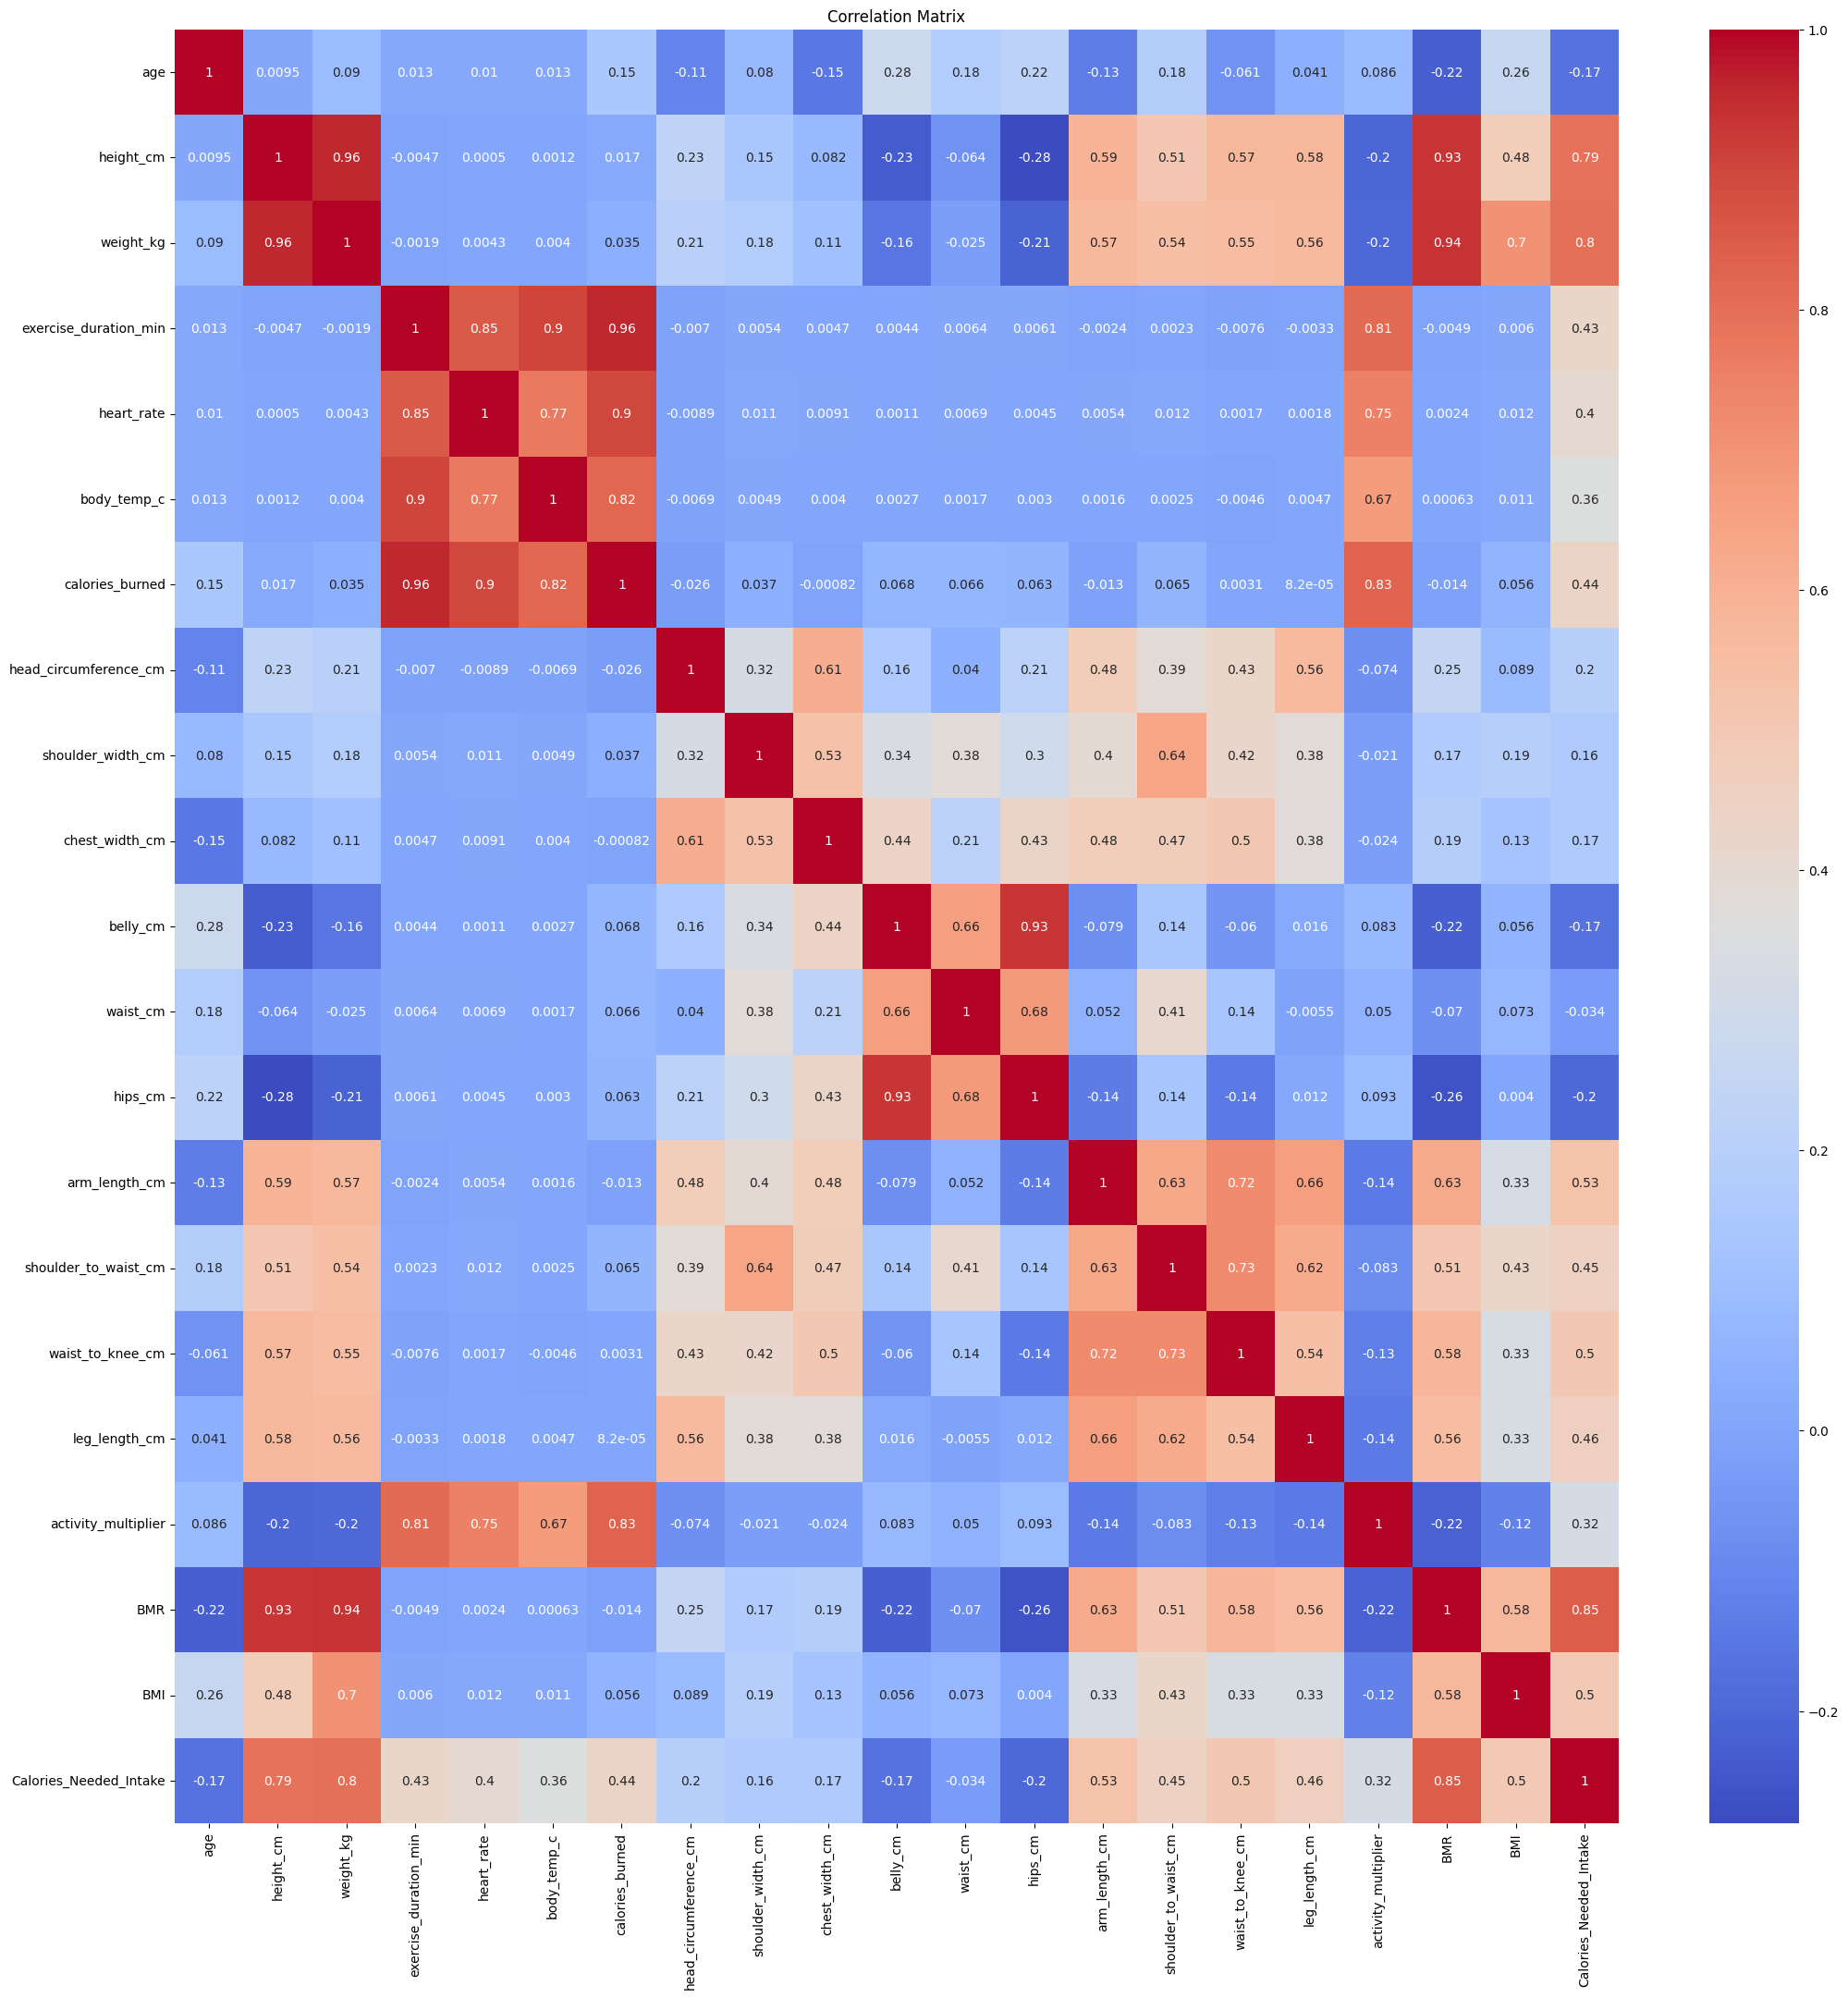

In [54]:
num_cols = df.select_dtypes(include='number').shape[1]

plt.figure(figsize=(num_cols * 1.2, num_cols * 1.2))

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [55]:
Obj_cols = X.select_dtypes(include="object").columns
Obj_cols

Index(['gender', 'exercise_type', 'activity_level'], dtype='object')

In [56]:
le = LabelEncoder()
X["gender"] = le.fit_transform(X["gender"])
X["exercise_type"] = le.fit_transform(X["exercise_type"])

In [57]:
X["activity_level"].value_counts()

,count
activity_level,
Lightly Active,5631
Very Active,4550
Moderately Active,3516
Sedentary,915
Extra Active,387


In [58]:
X["activity_level"].unique()


mapping = {
    "Lightly Active": 0,
    "Very Active": 1,
    "Moderately Active": 2,
    "Sedentary":3,
    "Extra Active":4
}

X["activity_level"] = X["activity_level"].map(mapping)

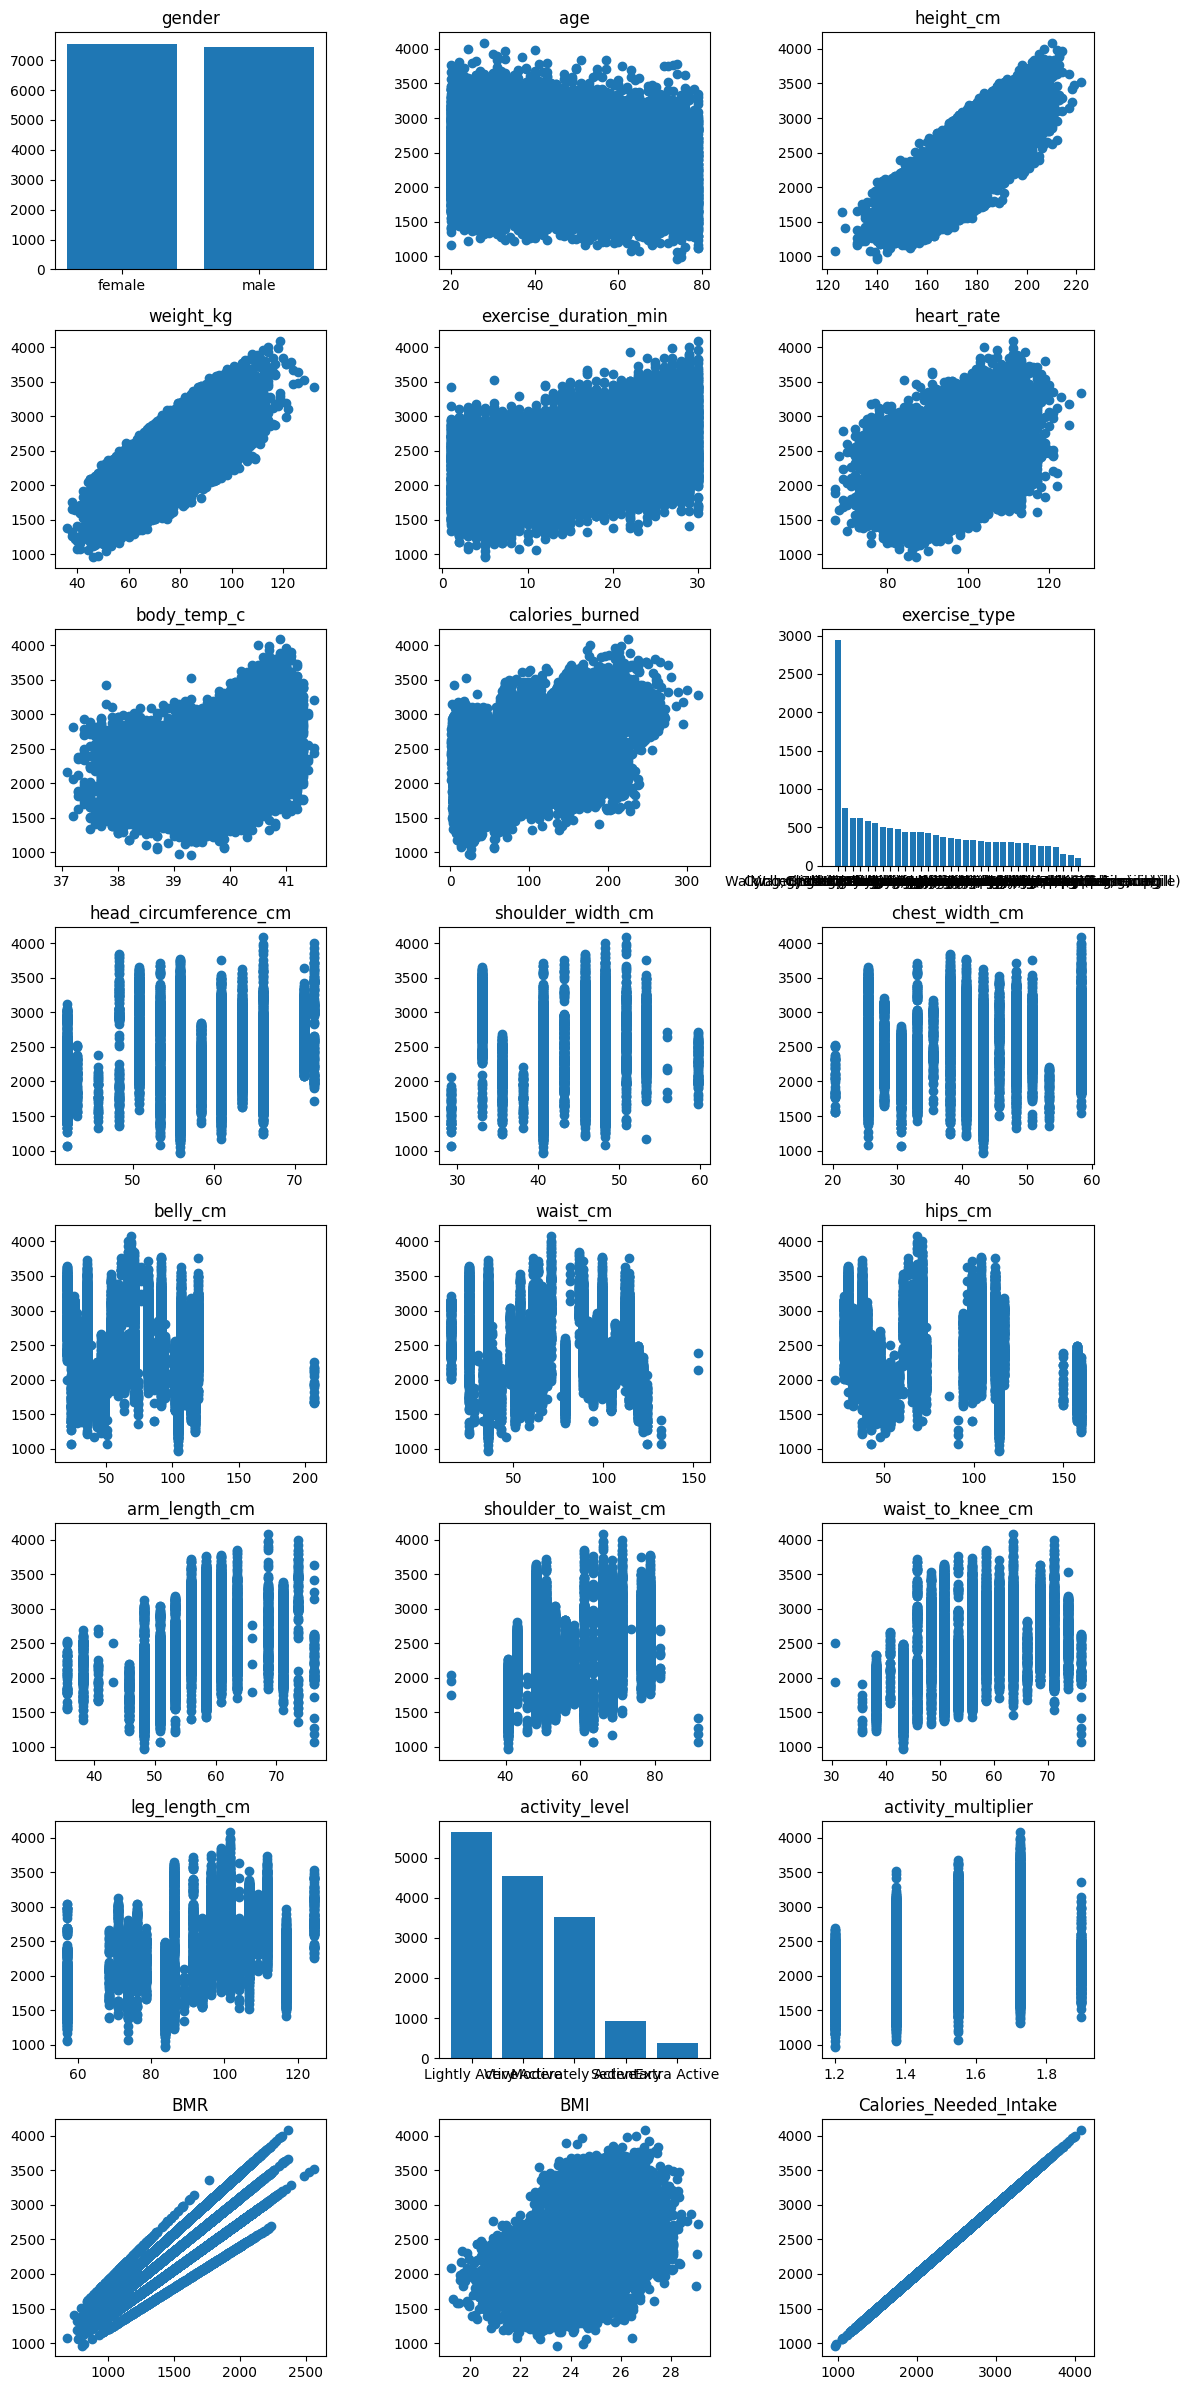

In [59]:
import math
import matplotlib.pyplot as plt

n = len(df.columns)
n_cols = 3
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)

    if df[col].dtype in ['int64', 'float64']:
        plt.scatter(df[col] , df["Calories_Needed_Intake"])
    else:
        plt.bar(df[col].value_counts().index, df[col].value_counts().values)

    plt.title(col)
plt.tight_layout()
plt.show()


In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

models = []
models.append((
    "Poly",
    Pipeline([
        ("poly", PolynomialFeatures()),
        ("LR", LinearRegression())
    ])
))
models.append(("LR", LinearRegression()))
models.append(("RF", RandomForestRegressor()))
models.append(("DT", DecisionTreeRegressor()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("XG", XGBRegressor()))

In [85]:
param_grids = {
    "Poly":{
        "Poly__poly__degree": [2, 3],
        "Poly__LR__fit_intercept": [True, False],
        "Poly__LR__positive": [True, False]
    },

    "LR": {
        "LR__fit_intercept": [True, False],
        "LR__positive": [True, False]
    },

    "RF": {
        "RF__n_estimators": [100, 200, 300],
        "RF__max_depth": [None, 5, 10, 20],
        "RF__min_samples_split": [2, 5, 10],
        "RF__min_samples_leaf": [1, 2, 4],
        "RF__max_features": ["auto", "sqrt", "log2"]
    },

    "DT": {
        "DT__max_depth": [None, 5, 10, 20],
        "DT__min_samples_split": [2, 5, 10],
        "DT__min_samples_leaf": [1, 2, 4],
        "DT__max_features": ["auto", "sqrt", "log2"]
    },

    "KNN": {
        "KNN__n_neighbors": [3, 5, 7, 9],
        "KNN__weights": ["uniform", "distance"],
    },

    "XG": {
        "XG__n_estimators": [100, 200, 300],
        "XG__learning_rate": [0.01, 0.05, 0.1, 0.2],
        "XG__max_depth": [3, 6, 9],
        "XG__subsample": [0.6, 0.8, 1.0],
    }
}

In [89]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

for model_name, model in models:
   pipeline = Pipeline([(model_name, model)])

   grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[model_name],
        cv=5,
        scoring="neg_mean_squared_error",
        return_train_score=True
    )

   grid_search.fit(X_train, y_train)

   print(f"Best parameters for {model_name}:")
   print(grid_search.best_params_)
   print("Best train accuracy:", grid_search.cv_results_['mean_train_score'][grid_search.best_index_])
   print("Best test accuracy:", grid_search.cv_results_['mean_test_score'][grid_search.best_index_])

   best_model = grid_search.best_estimator_

   y_pred = best_model.predict(X_test)
   y_pred_train = best_model.predict(X_train)

   print(f"Mean absolute error = {mean_absolute_error(y_train, y_pred_train):.2f}")
   print(f"Mean squared error = {mean_squared_error(y_train, y_pred_train):.2f}")
   print(f"RMSE = {mean_squared_error(y_train, y_pred_train)**0.5:.2f}")
   print(f"R²   = {r2_score(y_train, y_pred_train):.2f}")
   print(f"MAPE test: {mean_absolute_percentage_error(y_train, y_pred_train) * 100:.2f}%")
   print()
   print(f"Mean absolute error = {mean_absolute_error(y_test, y_pred):.2f}")
   print(f"Mean squared error = {mean_squared_error(y_test, y_pred):.2f}")
   print(f"RMSE = {mean_squared_error(y_test, y_pred)**0.5:.2f}")
   print(f"R²   = {r2_score(y_test, y_pred):.2f}")
   print(f"MAPE test: {mean_absolute_percentage_error(y_test, y_pred) * 100:.2f}%")
   print("-"*50)
   print("-"*50)



Best parameters for Poly:
{'Poly__LR__fit_intercept': True, 'Poly__LR__positive': True, 'Poly__poly__degree': 2}
Best train accuracy: -8.708819084701326e-26
Best test accuracy: -8.960723906711069e-26
Mean absolute error = 0.00
Mean squared error = 0.00
RMSE = 0.00
R²   = 1.00
MAPE test: 0.00%

Mean absolute error = 0.00
Mean squared error = 0.00
RMSE = 0.00
R²   = 1.00
MAPE test: 0.00%
--------------------------------------------------
--------------------------------------------------
Best parameters for LR:
{'LR__fit_intercept': True, 'LR__positive': False}
Best train accuracy: -2647.817654269082
Best test accuracy: -2665.4160322464168
Mean absolute error = 40.82
Mean squared error = 2649.57
RMSE = 51.47
R²   = 0.99
MAPE test: 1.84%

Mean absolute error = 41.09
Mean squared error = 2683.21
RMSE = 51.80
R²   = 0.99
MAPE test: 1.83%
--------------------------------------------------
--------------------------------------------------
Best parameters for RF:
{'RF__max_depth': 20, 'RF__ma